In [37]:
import os 
import json


import pycoco as pcc

In [38]:
output_dir = "/Users/berto/projects/SDSS_sims/lcs/"
outlist = os.listdir(output_dir)

log_dir = "/Users/berto/projects/SDSS_sims/logs/"
log_list = os.listdir(log_dir)

In [39]:
outlist

['.DS_Store',
 'SN_000001.dat',
 'SN_000002.dat',
 'SN_000003.dat',
 'SN_000004.dat',
 'SN_000005.dat',
 'SN_000006.dat',
 'SN_000007.dat',
 'SN_000008.dat',
 'SN_000009.dat',
 'SN_000010.dat']

In [ ]:
log_list

/Users/berto/projects/SDSS_sims/lcs/SN_000001.dat


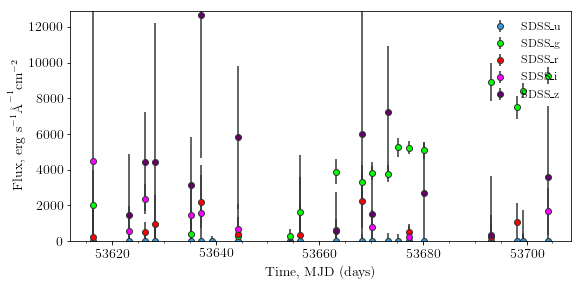

/Users/berto/projects/SDSS_sims/lcs/SN_000002.dat


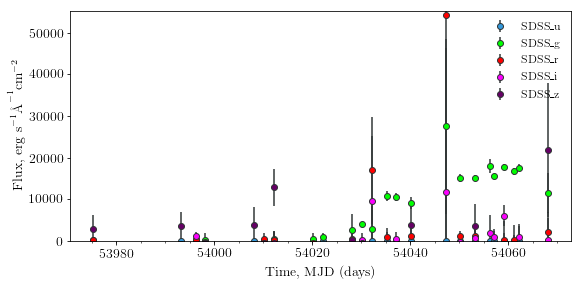

/Users/berto/projects/SDSS_sims/lcs/SN_000003.dat


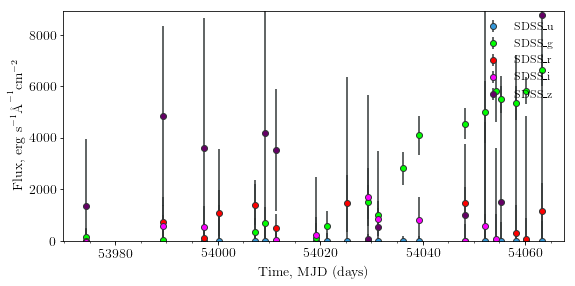

/Users/berto/projects/SDSS_sims/lcs/SN_000004.dat


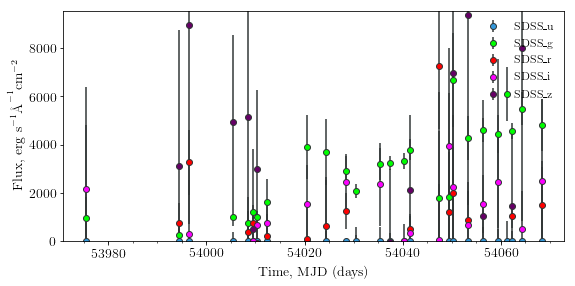

/Users/berto/projects/SDSS_sims/lcs/SN_000005.dat


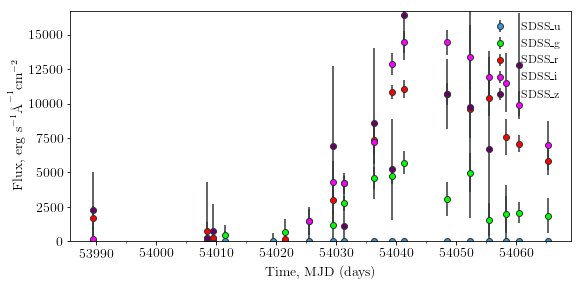

/Users/berto/projects/SDSS_sims/lcs/SN_000006.dat


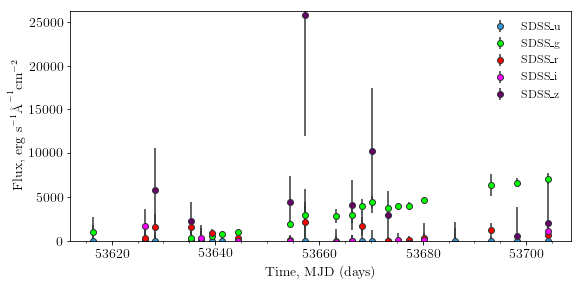

/Users/berto/projects/SDSS_sims/lcs/SN_000007.dat


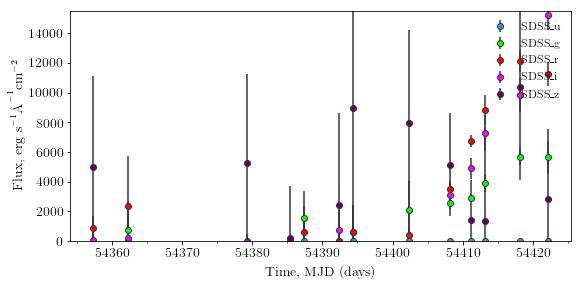

/Users/berto/projects/SDSS_sims/lcs/SN_000008.dat


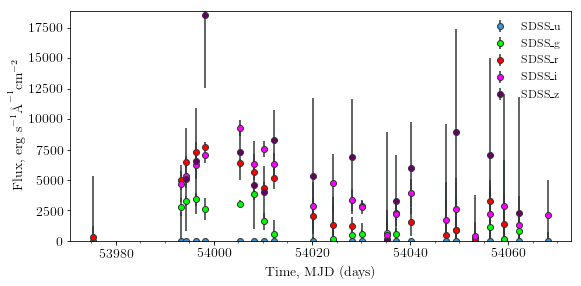

/Users/berto/projects/SDSS_sims/lcs/SN_000009.dat


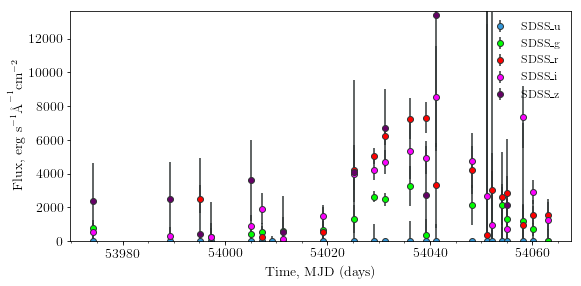

/Users/berto/projects/SDSS_sims/lcs/SN_000010.dat


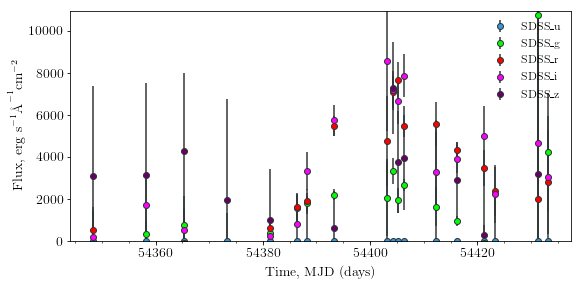

In [40]:
verbose = True
for i, snpath in enumerate(outlist):
    if snpath != '.DS_Store':
        snpath = os.path.join(output_dir, snpath)
        if verbose: print(snpath)
        p = pcc.PhotometryClass()
        p.load(snpath)
        
        p.plot()

In [6]:
for j, snlog in enumerate(log_list):
    snlog = os.path.join(output_dir, snlog)
    with open('data.txt') as json_file:  
        data = json.load(json_file)
        json_file.close()

In [8]:
x = str(x)

In [13]:
x.rjust(6, "0")

'000001'

In [25]:
locals()

{'In': ['',
  'import pycoco as pcc',
  'output_dir = "/Users/berto/projects/SDSS_sims/lcs/"\noutlist = os.listdir(output_dir)',
  'import os \n\nimport pycoco as pcc',
  'output_dir = "/Users/berto/projects/SDSS_sims/lcs/"\noutlist = os.listdir(output_dir)',
  'outlist',
  'x = 1',
  'x = str(x)',
  'x = str(x)',
  "get_ipython().magic('pinfo x.format')",
  'x.ljust()',
  "get_ipython().magic('pinfo x.ljust')",
  'x.ljust(6, "0")',
  'x.rjust(6, "0")',
  'output_dir = "/Users/berto/projects/SDSS_sims/lcs/"\noutlist = os.listdir(output_dir)',
  'outlist',
  "for snpath in outlist if snpath is not '.DS_Store':",
  "for snpath in outlist if snpath not '.DS_Store':",
  "for snpath in outlist:\n    if snpath not '.DS_Store':\n        print(snpath)",
  "for snpath in outlist:\n    if snpath !== '.DS_Store':\n        print(snpath)",
  "for snpath in outlist:\n    if snpath != '.DS_Store':\n        print(snpath)",
  "verbose = True\nfor snpath in outlist:\n    if snpath != '.DS_Store':\n     

TypeError: str() argument 2 must be str, not int